In [24]:
import matplotlib
import pandas as pd 
import numpy as np

# making plots
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import math

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # to see all columns in the pd dataframe
%config InlineBackend.figure_format = 'retina' # for the crispier version of plots for retina screens

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

In [2]:
filename = 'data/my_database.xls'

data = pd.read_excel(filename, sheet_name="main", converters= {'Date': pd.to_datetime})
data.set_index(pd.to_datetime(data.Date),inplace=True)

print("Loaded db successfully!")

Loaded db successfully!


In [83]:
dayCodes = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
minDayCodes = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

days = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

def is_nan(x):
    return (x is np.nan or x != x)

# Specifies approximate sleep start time to the upcoming half hour.
def defineSleepBucket(row):
    sleepEntry = row['Sleep Start time']
    if not is_nan(sleepEntry):
        sleepTimeO = datetime.datetime.strptime(sleepEntry, '%Y-%m-%dT%H:%M:%S.000').time()        
        if sleepTimeO.minute > 30:
            return (sleepTimeO.hour + 1)
        elif sleepTimeO.minute > 0:
            return sleepTimeO.hour + 0.5
    else:
        return np.nan

# Specifies approximate sleep wake time to the upcoming half hour.
def defineAwakeBucket(row):
    awakeEntry = row['Sleep End time']
    if not is_nan(awakeEntry):
        awakeEntryO = datetime.datetime.strptime(awakeEntry, '%Y-%m-%dT%H:%M:%S.000').time()        
        if awakeEntryO.minute > 30:
            return (awakeEntryO.hour + 1)
            #return '{}:{}'.format(str((awakeEntryO.hour + 1)), '00')
        elif awakeEntryO.minute > 0:
            return awakeEntryO.hour + 0.5
            #return '{}:{}'.format(str(awakeEntryO.hour), ':30')
    else:
        return np.nan    

#remove all entries where there was no steps recorded. i.e no activity
data = data[data['Steps'].notnull()]

data['Day Label'] = data['Day of Week'].apply(lambda x: days[x])
data['Active exercise'] = (data['Minutes Very Active'] + data['Minutes Fairly Active']) > 30

#Build additional Sleep columns
data['Sleep Bucket'] = data.apply(defineSleepBucket, axis=1)
data['Awake Bucket'] = data.apply(defineAwakeBucket, axis=1)

data['% Awake'] = 100 - (data['% Deep sleep'] + data['% REM sleep'] + data['% Light sleep'])
data['% Restorative sleep'] = data['% Deep sleep'] + data['% REM sleep']
data['Restorative sleep mins'] = data['Minutes Deep sleep'] + data['Minutes REM sleep']

#remove all entries where there was no Deep sleep recorded
sleepData = data[data['% Deep sleep'].notnull()]

In [84]:
print("Contains {} records ranging from {} to {}".format(str(len(data)), str(data.iloc[0]['Date']), str(data.iloc[-1]['Date'])))
print('Contains {} entries of Sleep data'.format(len(sleepData)))

data.head()

Contains 20 records ranging from 2020-04-11 00:00:00 to 2020-04-30 00:00:00
Contains 17 entries of Sleep data


,Date,Day of Week,Is Weekday,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Resting Heart Rate,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Cardio minutes,Cardio calories,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio calories,Normal Cardio minutes,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Sleep Start time,Sleep End time,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep,Day Label,Active exercise,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Restorative sleep mins
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-11,2020-04-11,6,0,1,1168,1150,115,0.08,NaN,1364,11,0,0,24,0,0.0000,4,9.9875,0,0.0000,108.5841,122,95.0,341.0,0.0,2020-04-12T03:56:00.000,2020-04-12T10:32:00.000,396.0,83.0,2.0,202.0,28.0,56.0,6.0,55.0,30.0,21.0,52.0,15.0,Sat,False,4.0,11.0,12.0,36.0,139.0
2020-04-12,2020-04-12,7,0,1,1349,1150,2024,1.36,61.0,924,120,0,0,259,0,0.0000,21,42.5867,0,0.0000,1261.9406,1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sun,False,NaN,NaN,NaN,NaN,NaN
2020-04-13,2020-04-13,1,1,0,1624,1150,6795,5.41,60.0,1323,69,5,43,533,6,37.3932,38,98.2770,35,299.1456,562.8156,593,92.0,289.0,0.0,2020-04-14T03:41:30.000,2020-04-14T09:19:00.000,337.0,66.0,3.0,170.0,25.0,53.0,7.0,48.0,27.0,20.0,51.0,16.0,Mon,True,4.0,9.5,13.0,36.0,119.0
2020-04-14,2020-04-14,2,1,0,1337,1150,1665,1.12,56.0,1008,95,0,0,210,0,0.0000,28,50.4169,0,0.0000,1287.5086,1412,95.0,473.0,0.0,2020-04-15T02:42:00.000,2020-04-15T11:41:30.000,539.0,135.0,3.0,234.0,35.0,104.0,13.0,66.0,39.0,26.0,44.0,20.0,Tue,False,3.0,12.0,10.0,46.0,239.0
2020-04-15,2020-04-15,3,1,0,1449,1150,2709,1.82,55.0,769,120,7,5,363,3,15.7403,79,218.4466,0,0.0000,1186.1155,1322,96.0,361.0,0.0,2020-04-16T02:23:00.000,2020-04-16T09:09:00.000,406.0,76.0,4.0,208.0,25.0,77.0,3.0,45.0,24.0,19.0,52.0,19.0,Wed,False,2.5,9.5,10.0,38.0,153.0


In [6]:
data.groupby(['Day of Week']).mean()

,Is Weekday,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Resting Heart Rate,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Cardio minutes,Cardio calories,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio calories,Normal Cardio minutes,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep,Active exercise,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Restorative sleep mins
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1455.666667,1150.000000,3751.666667,2.803333,53.000000,985.333333,101.333333,1.666667,14.333333,358.666667,2.000000,12.464400,18.000000,48.925433,11.666667,99.715200,1082.458567,1148.000000,95.000000,358.000000,0.0,425.000000,79.666667,3.333333,202.000000,27.000000,76.333333,9.000000,67.000000,28.666667,19.333333,48.333333,18.333333,0.333333,3.166667,10.333333,14.000000,37.666667,156.000000
2,1.0,0.0,1641.000000,1150.000000,5985.666667,4.673333,52.000000,871.000000,107.333333,4.000000,32.666667,557.000000,6.000000,37.046967,24.333333,67.648667,24.000000,234.666300,1269.344667,1358.333333,93.666667,463.000000,0.0,535.333333,107.333333,4.333333,242.333333,28.666667,113.333333,12.666667,72.333333,32.333333,20.666667,45.666667,22.000000,0.333333,2.500000,11.500000,11.666667,42.666667,220.666667
3,1.0,0.0,1675.333333,1150.000000,6498.666667,5.086667,52.666667,749.666667,114.000000,6.333333,34.666667,599.333333,4.666667,29.003700,49.666667,137.987300,26.000000,246.145267,1233.096700,1331.666667,93.666667,427.666667,0.0,499.000000,88.666667,5.333333,240.666667,32.666667,98.333333,8.666667,71.333333,33.333333,18.666667,49.333333,19.333333,0.333333,2.166667,10.500000,12.666667,38.000000,187.000000
4,1.0,0.0,1529.666667,1128.666667,5068.666667,3.850000,52.000000,784.000000,103.666667,3.333333,23.333333,464.333333,4.666667,28.604200,29.000000,76.890433,18.000000,167.843267,1175.275733,1264.666667,93.000000,438.000000,0.0,530.000000,110.000000,5.000000,227.000000,31.000000,101.000000,10.000000,92.000000,33.000000,21.000000,43.000000,20.000000,0.333333,2.000000,11.000000,16.000000,41.000000,211.000000
5,1.0,0.0,1346.500000,1150.000000,1993.500000,1.340000,52.500000,1073.500000,95.000000,6.500000,0.000000,242.500000,0.000000,0.000000,14.000000,45.742750,0.000000,0.000000,1059.194350,1123.500000,93.500000,351.500000,0.0,409.500000,91.500000,4.000000,191.000000,27.500000,69.000000,8.000000,58.000000,30.000000,22.500000,47.500000,17.500000,0.000000,3.750000,10.500000,12.500000,40.000000,160.500000
6,0.0,1.0,1278.666667,1150.000000,1347.000000,0.910000,50.500000,1044.000000,62.666667,0.000000,0.000000,150.333333,1.333333,8.309600,7.000000,18.350367,0.000000,0.000000,879.725633,965.333333,94.333333,371.666667,0.0,431.333333,84.666667,3.666667,214.333333,30.333333,72.666667,7.000000,59.666667,31.666667,20.000000,50.000000,17.333333,0.000000,3.166667,10.500000,12.666667,37.333333,157.333333
7,0.0,1.0,1425.000000,1150.000000,3616.333333,2.676667,53.000000,885.000000,113.666667,1.000000,9.000000,338.000000,0.000000,0.000000,9.666667,22.105667,4.666667,43.891733,1208.514133,1277.333333,96.000000,435.500000,0.0,506.000000,82.000000,5.000000,255.500000,29.000000,98.000000,8.000000,70.500000,27.500000,17.500000,51.000000,19.500000,0.000000,1.750000,10.250000,12.000000,37.000000,180.000000


In [90]:
def getDayLabel(dayNum):
    return dayCodes[dayNum]

def plot_heatmap(corrmat, title):
    sns.set(style = "white")
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

# Analyses

In [8]:
data[['Calories Burned', 'Steps', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Cardio minutes', 'Fat Burn minutes', 'Active exercise', 'Resting Heart Rate']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories Burned,20.0,1485.450000,220.395452,1168.0,1346.00,1399.5,1631.50,1932.0
Steps,20.0,4139.550000,3105.526847,115.0,1925.25,2712.5,6448.25,10056.0
Minutes Sedentary,20.0,905.200000,204.157215,651.0,767.00,844.0,925.75,1364.0
Minutes Fairly Active,20.0,3.100000,4.327391,0.0,0.00,0.0,5.50,13.0
Minutes Very Active,20.0,17.100000,23.914101,0.0,0.00,0.0,28.75,70.0
Cardio minutes,20.0,2.800000,3.805813,0.0,0.00,0.0,5.25,14.0
Fat Burn minutes,20.0,22.050000,20.932159,1.0,4.00,17.0,30.50,79.0
Resting Heart Rate,19.0,52.315789,3.528497,48.0,50.50,51.0,53.00,61.0


In [63]:
sleepData[['Time in bed', 'Minutes Asleep', 'Minutes Awake', 'Minutes Deep sleep', 'Minutes Light sleep', 'Minutes REM sleep', 'Sleep Efficiency']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time in bed,17.0,472.529412,83.390735,337.0,406.0,473.0,533.0,643.0
Minutes Asleep,17.0,404.294118,69.703627,289.0,361.0,409.0,450.0,548.0
Minutes Awake,17.0,68.235294,17.009297,45.0,52.0,68.0,82.0,95.0
Minutes Deep sleep,17.0,90.470588,17.525402,66.0,77.0,90.0,97.0,135.0
Minutes Light sleep,17.0,224.588235,37.446727,163.0,202.0,219.0,239.0,298.0
Minutes REM sleep,17.0,89.235294,27.851233,53.0,74.0,88.0,104.0,159.0
Sleep Efficiency,17.0,94.235294,1.714986,92.0,93.0,94.0,95.0,97.0


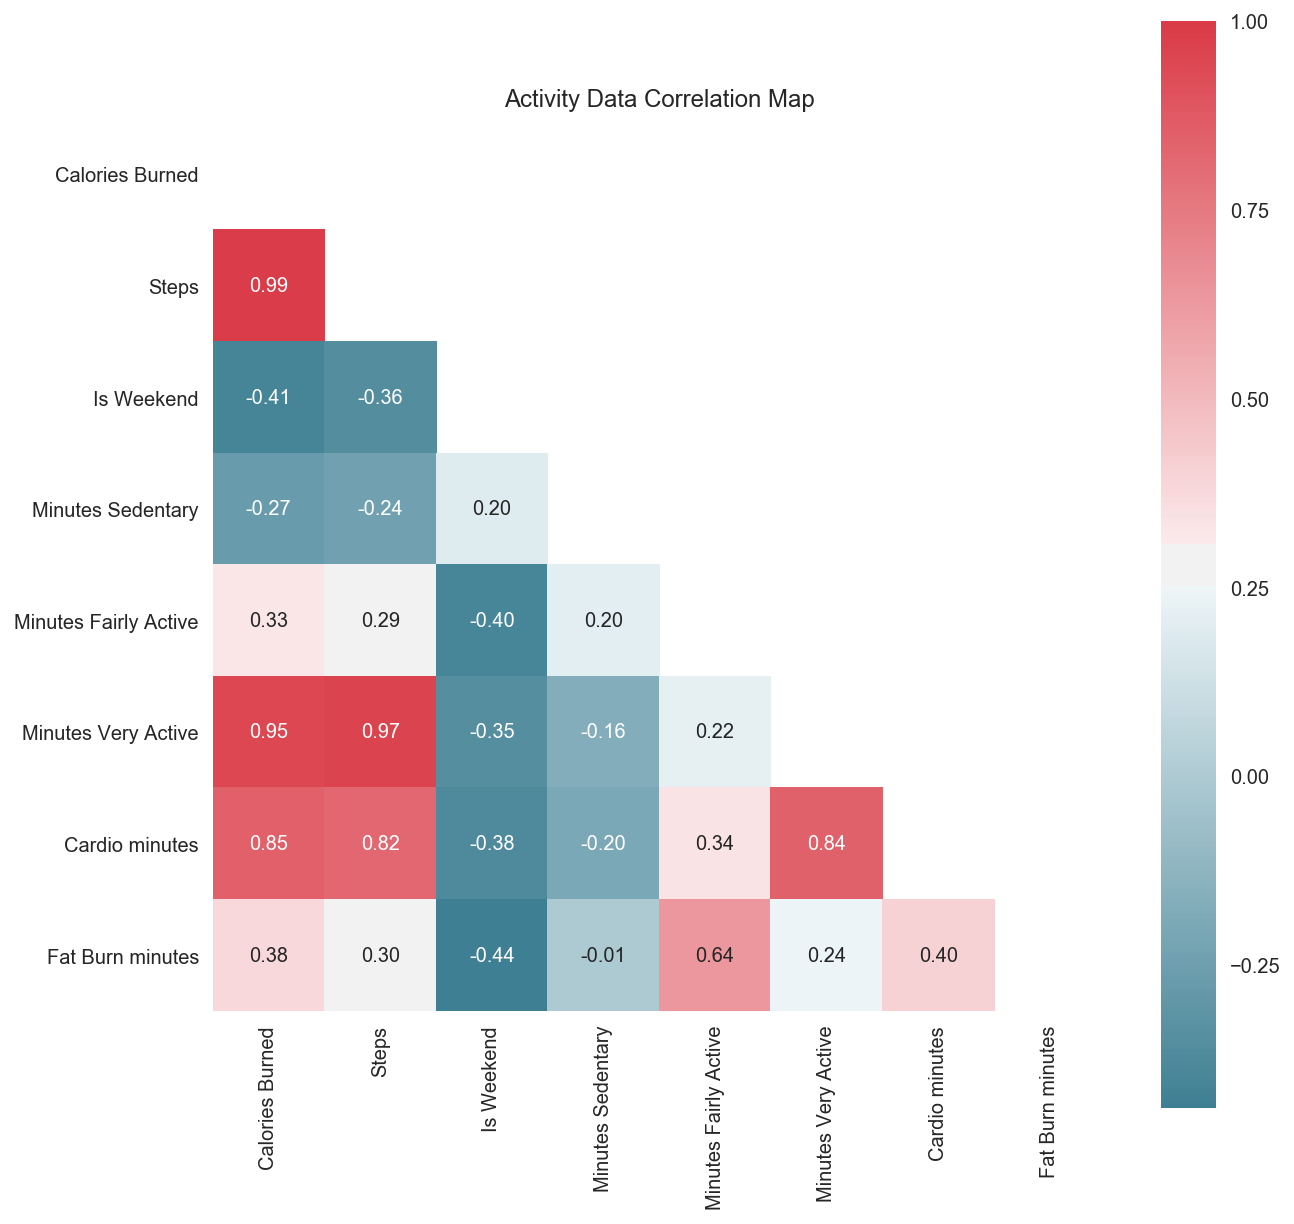

In [92]:
correlationOf = 'Calories Burned'
corrdf_calories = data[['Calories Burned','Steps', 'Is Weekend', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Cardio minutes', 'Fat Burn minutes']]
plot_heatmap(corrdf_calories.corr(), 'Activity Data Correlation Map')

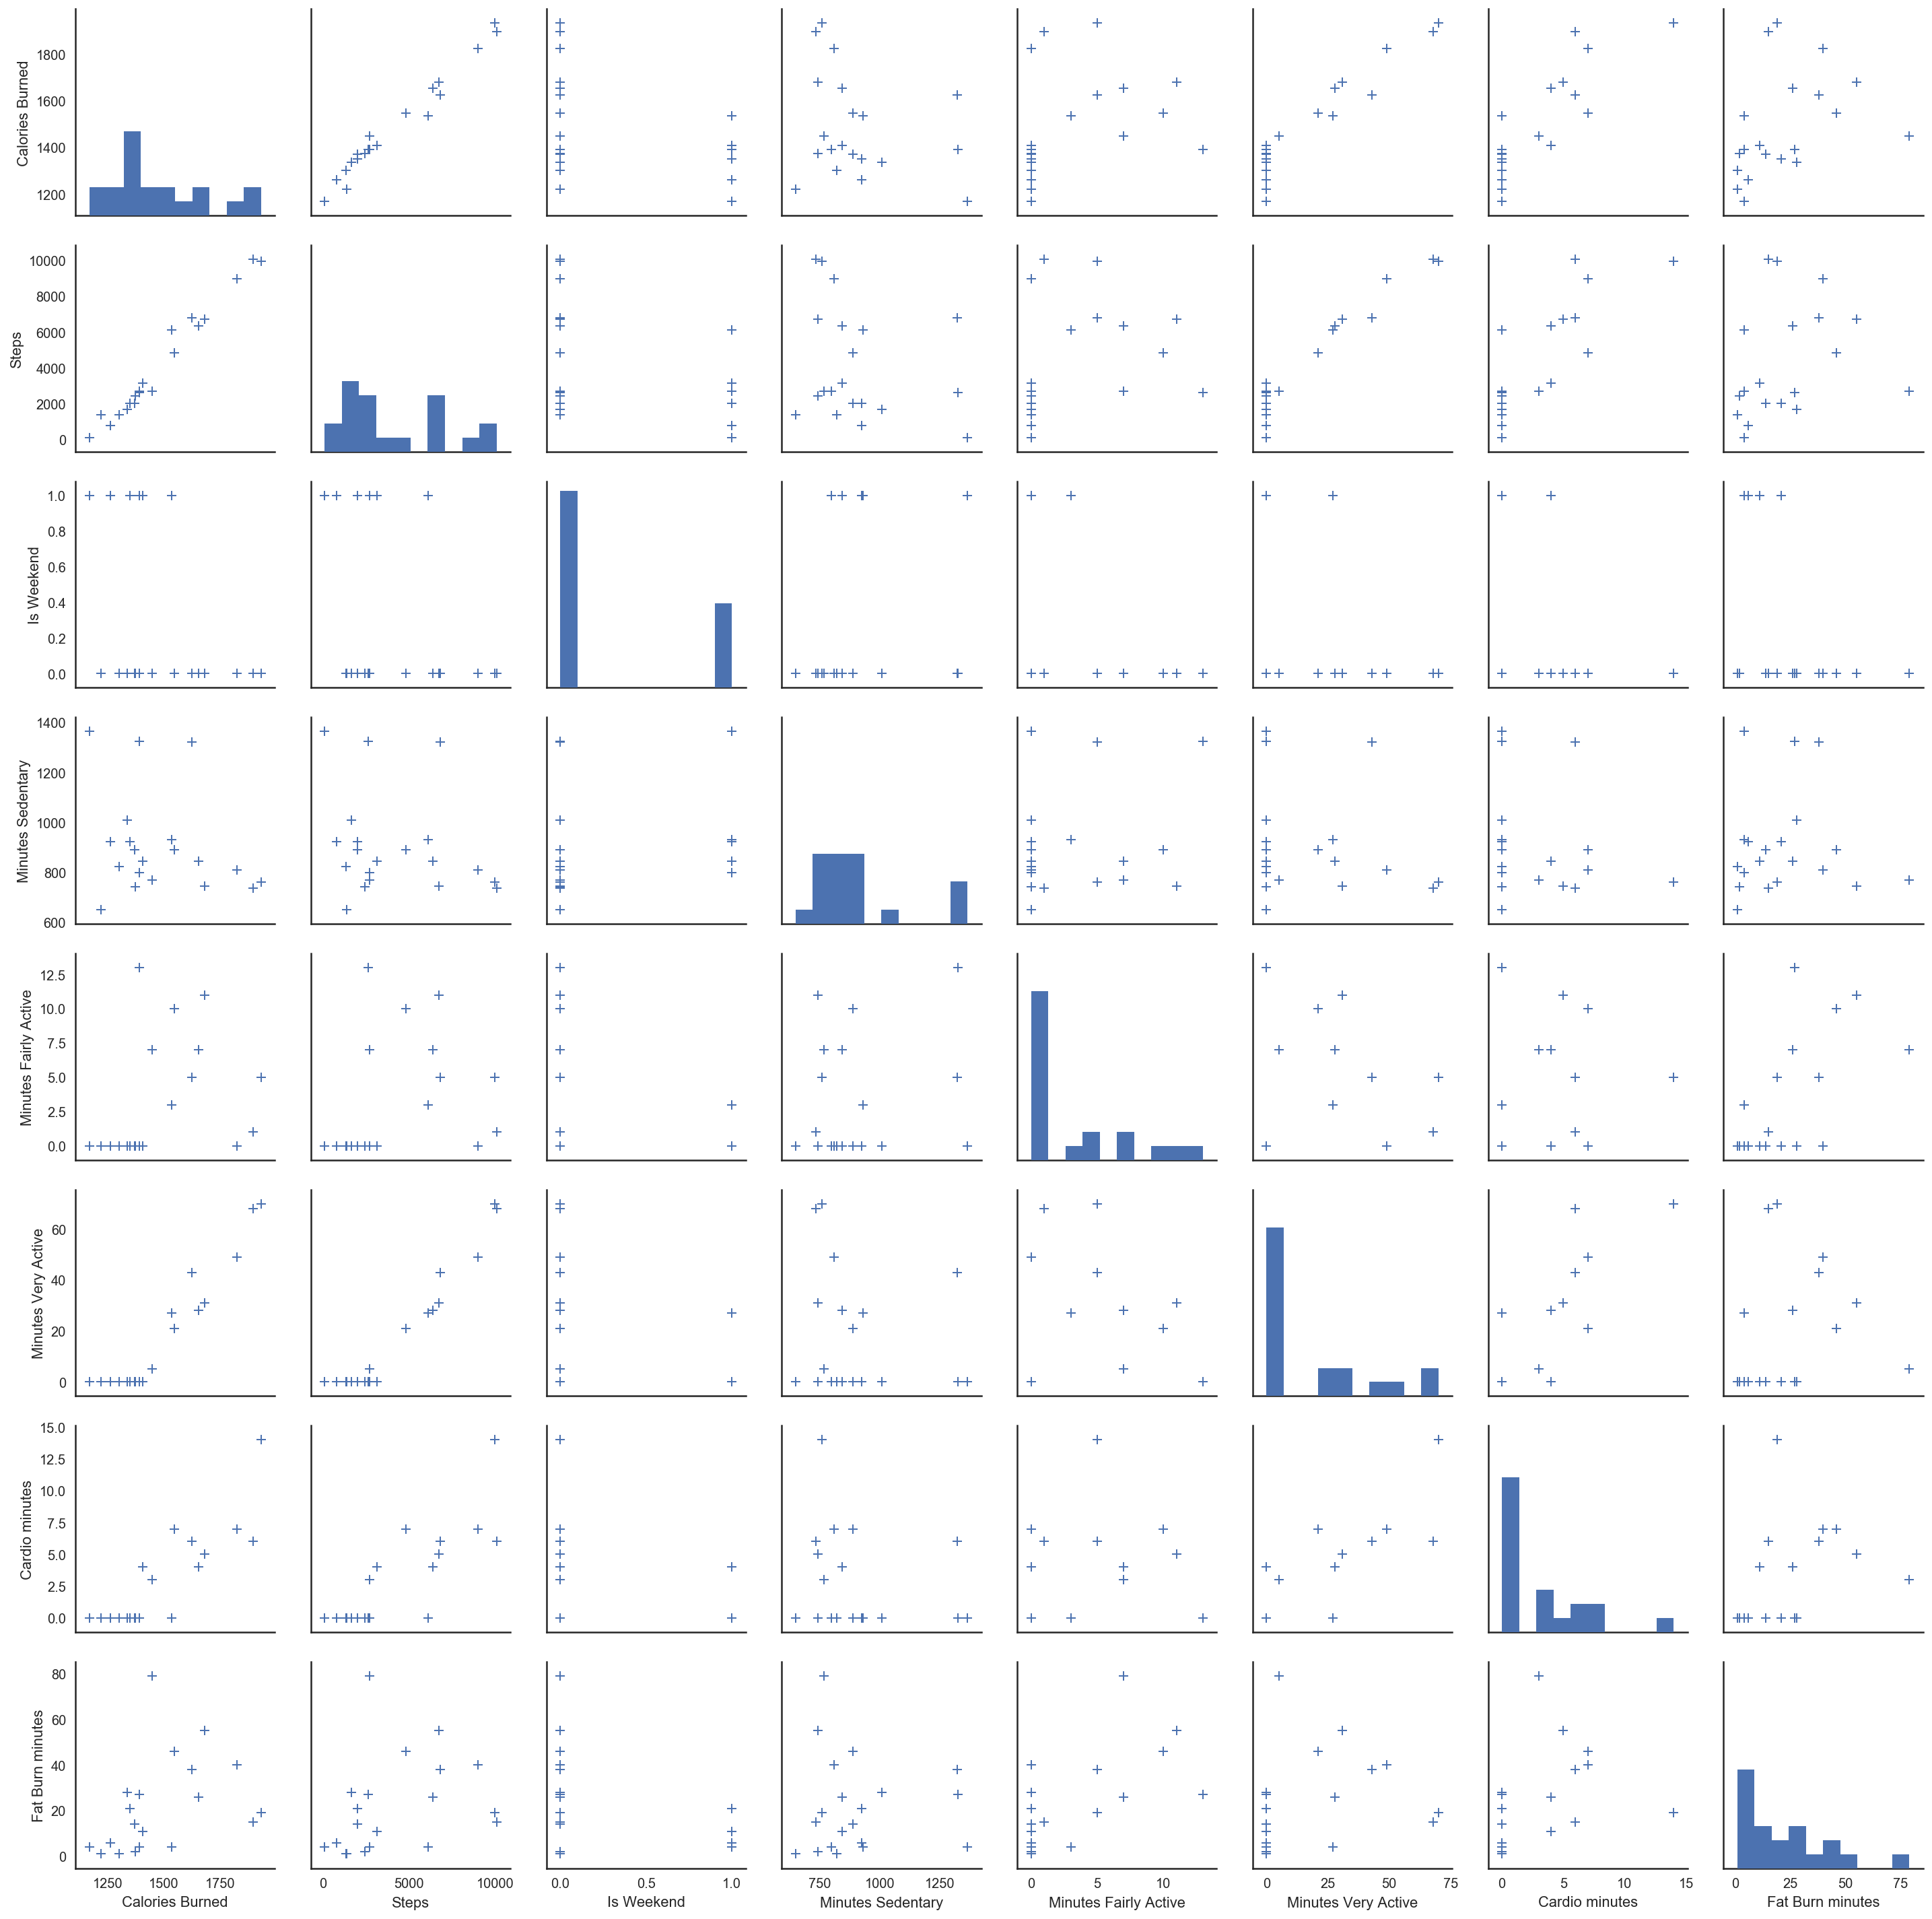

In [11]:
sns.pairplot(corrdf_calories.dropna(), kind="scatter", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

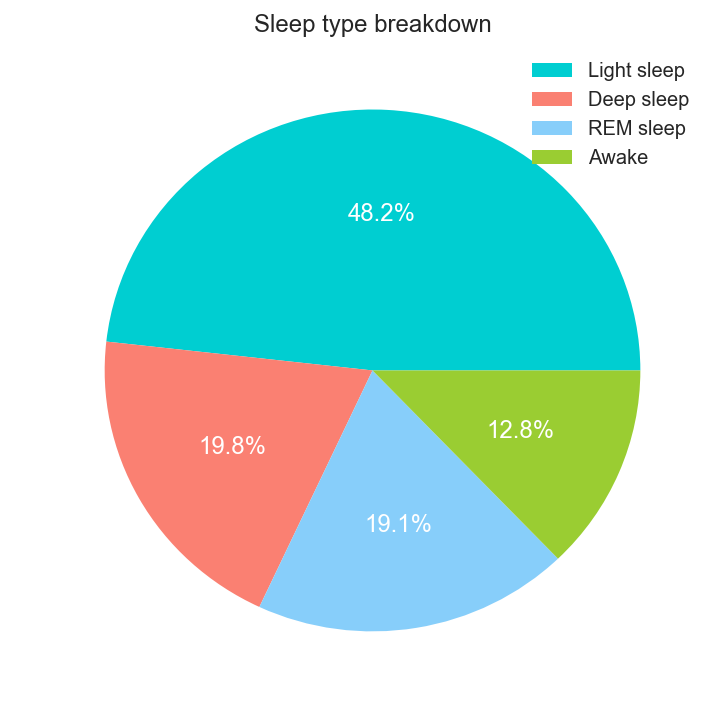

In [80]:
avgSleep = sleepData[['% Light sleep', '% Deep sleep', '% REM sleep', '% Awake']].mean()

fig = plt.figure(figsize = (6, 6))
labels=['Light sleep', 'Deep sleep', 'REM sleep', 'Awake']
plt.pie(avgSleep, colors = ['darkturquoise', 'salmon', 'lightskyblue', 'yellowgreen'], autopct='%1.1f%%', labels=labels, textprops=dict(color="w"))
plt.title('Sleep type breakdown')
plt.legend()
plt.show()

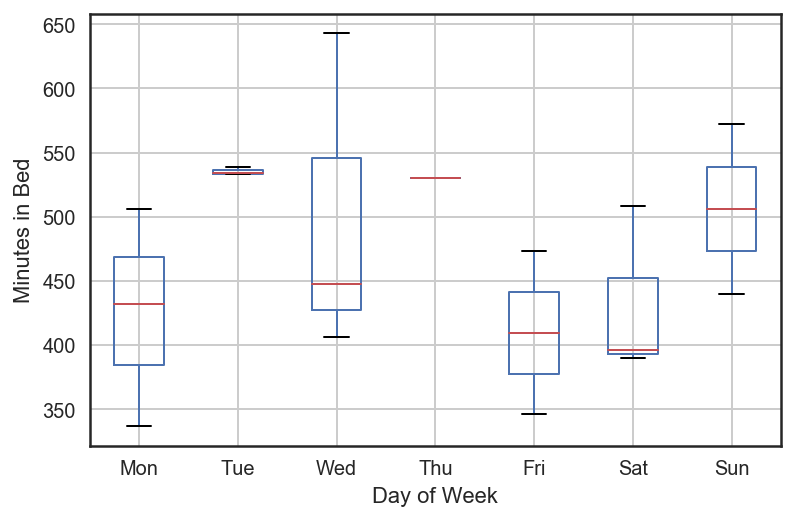

In [13]:
ax = sleepData.boxplot(column = 'Time in bed', by = 'Day of Week')
ax.set_xticklabels(minDayCodes[1:])
plt.ylabel('Minutes in Bed')
plt.suptitle('')
plt.title('');

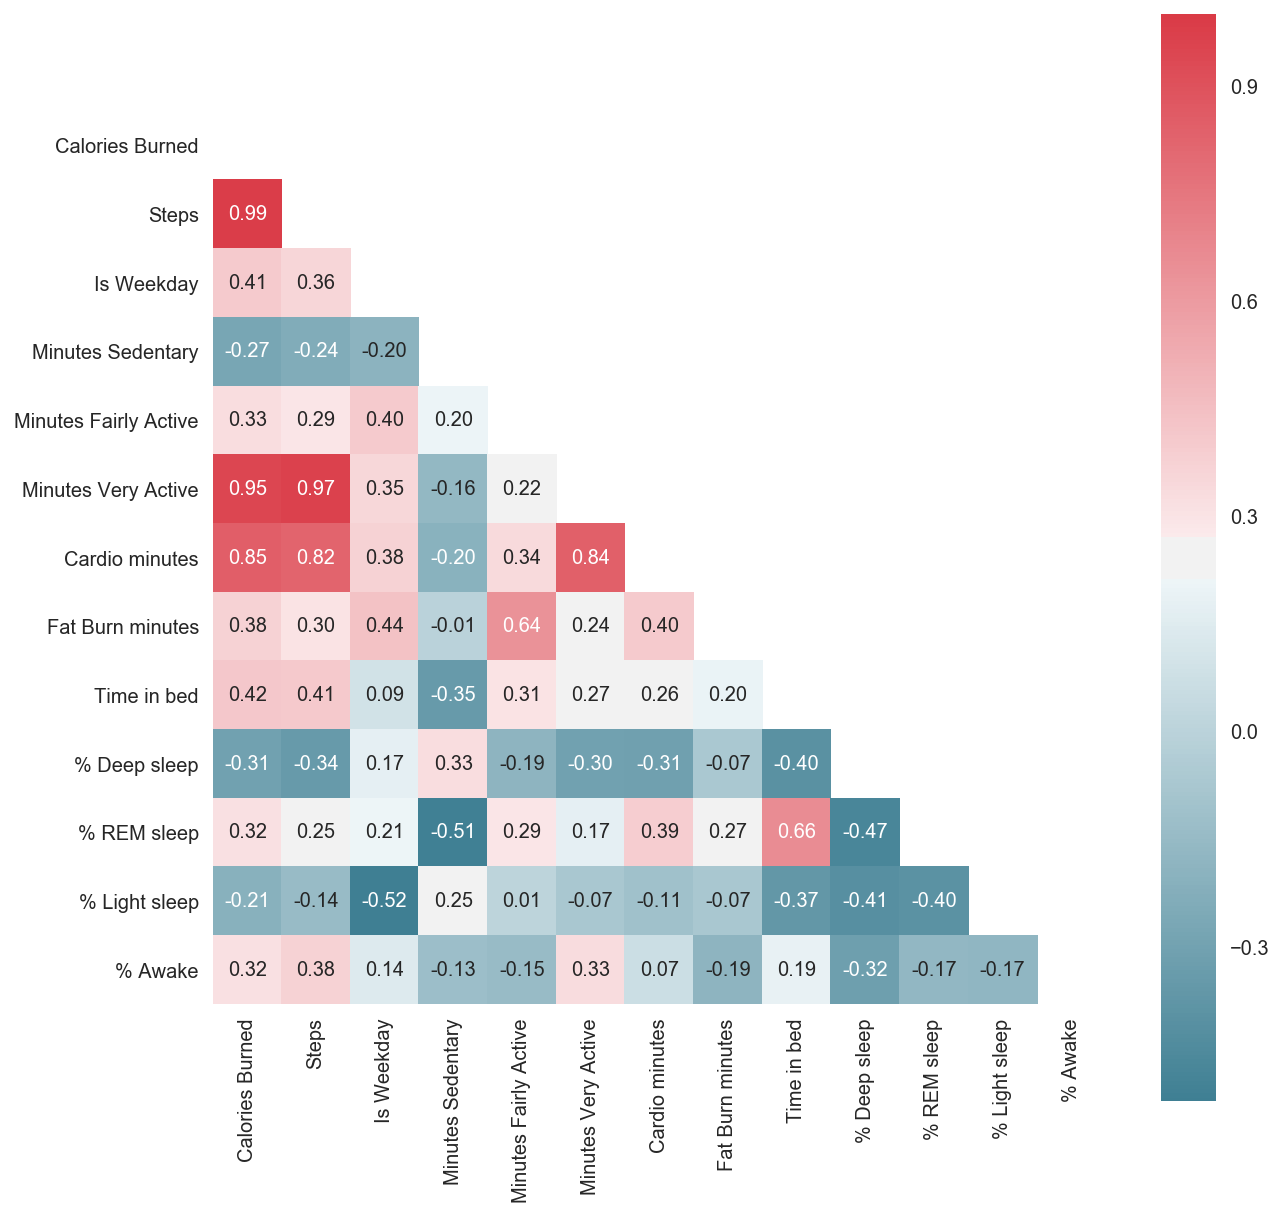

In [25]:
correlationOf = 'Calories Burned'
corrdf_calories = data[['Calories Burned','Steps', 'Is Weekday', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Cardio minutes', 'Fat Burn minutes', 'Time in bed', '% Deep sleep', '% REM sleep', '% Light sleep', '% Awake']]
plot_heatmap(corrdf_calories.corr(), correlationOf, '')

In [26]:
data

,Date,Day of Week,Is Weekday,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Resting Heart Rate,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Cardio minutes,Cardio calories,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio calories,Normal Cardio minutes,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Sleep Start time,Sleep End time,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep,Day Label,Active exercise,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Restorative sleep mins
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-11,2020-04-11,6,0,1,1168,1150,115,0.08,NaN,1364,11,0,0,24,0,0.0000,4,9.9875,0,0.0000,108.5841,122,95.0,341.0,0.0,2020-04-12T03:56:00.000,2020-04-12T10:32:00.000,396.0,83.0,2.0,202.0,28.0,56.0,6.0,55.0,30.0,21.0,52.0,15.0,Sat,False,4.0,11.0,12.0,36.0,139.0
2020-04-12,2020-04-12,7,0,1,1349,1150,2024,1.36,61.0,924,120,0,0,259,0,0.0000,21,42.5867,0,0.0000,1261.9406,1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sun,False,NaN,NaN,NaN,NaN,NaN
2020-04-13,2020-04-13,1,1,0,1624,1150,6795,5.41,60.0,1323,69,5,43,533,6,37.3932,38,98.2770,35,299.1456,562.8156,593,92.0,289.0,0.0,2020-04-14T03:41:30.000,2020-04-14T09:19:00.000,337.0,66.0,3.0,170.0,25.0,53.0,7.0,48.0,27.0,20.0,51.0,16.0,Mon,True,4.0,9.5,13.0,36.0,119.0
2020-04-14,2020-04-14,2,1,0,1337,1150,1665,1.12,56.0,1008,95,0,0,210,0,0.0000,28,50.4169,0,0.0000,1287.5086,1412,95.0,473.0,0.0,2020-04-15T02:42:00.000,2020-04-15T11:41:30.000,539.0,135.0,3.0,234.0,35.0,104.0,13.0,66.0,39.0,26.0,44.0,20.0,Tue,False,3.0,12.0,10.0,46.0,239.0
2020-04-15,2020-04-15,3,1,0,1449,1150,2709,1.82,55.0,769,120,7,5,363,3,15.7403,79,218.4466,0,0.0000,1186.1155,1322,96.0,361.0,0.0,2020-04-16T02:23:00.000,2020-04-16T09:09:00.000,406.0,76.0,4.0,208.0,25.0,77.0,3.0,45.0,24.0,19.0,52.0,19.0,Wed,False,2.5,9.5,10.0,38.0,153.0
2020-04-16,2020-04-16,4,1,0,1546,1150,4829,3.63,52.0,890,113,10,21,472,7,40.1897,46,129.2782,12,108.5042,1118.0407,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thu,True,NaN,NaN,NaN,NaN,NaN
2020-04-17,2020-04-17,5,1,0,1392,1150,2622,1.76,52.0,1324,103,13,0,298,0,0.0000,27,90.4468,0,0.0000,821.4519,812,95.0,409.0,0.0,2020-04-18T01:57:00.000,2020-04-18T09:50:00.000,473.0,111.0,4.0,219.0,30.0,79.0,10.0,64.0,35.0,24.0,47.0,17.0,Fri,False,2.0,10.0,12.0,41.0,190.0
2020-04-18,2020-04-18,6,0,1,1407,1150,3143,2.12,50.0,844,123,0,0,311,4,24.9288,11,36.2746,0,0.0000,1291.1041,1356,94.0,436.0,0.0,2020-04-19T01:12:00.000,2020-04-19T09:40:30.000,508.0,94.0,6.0,254.0,39.0,88.0,8.0,72.0,41.0,19.0,50.0,18.0,Sat,False,1.5,10.0,13.0,37.0,182.0
2020-04-19,2020-04-19,7,0,1,1391,1150,2716,1.83,48.0,800,132,0,0,305,0,0.0000,4,11.9051,0,0.0000,1380.0328,1436,97.0,394.0,0.0,2020-04-20T02:15:00.000,2020-04-20T09:35:30.000,440.0,93.0,7.0,213.0,23.0,88.0,8.0,46.0,23.0,22.0,49.0,20.0,Sun,False,2.5,10.0,9.0,42.0,181.0


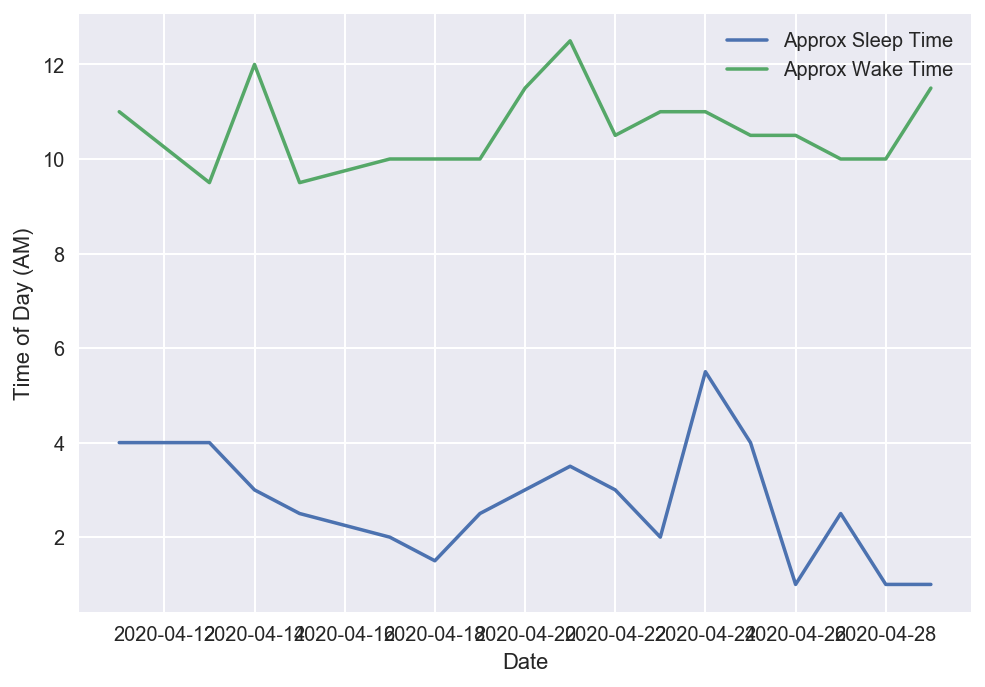

In [71]:
plt.plot(sleepData['Date'], sleepData['Sleep Bucket'], label="Approx Sleep Time") 
plt.plot(sleepData['Date'], sleepData['Awake Bucket'], label="Approx Wake Time")
plt.xlabel('Date')
plt.ylabel('Time of Day (AM)')
plt.legend()
plt.show()

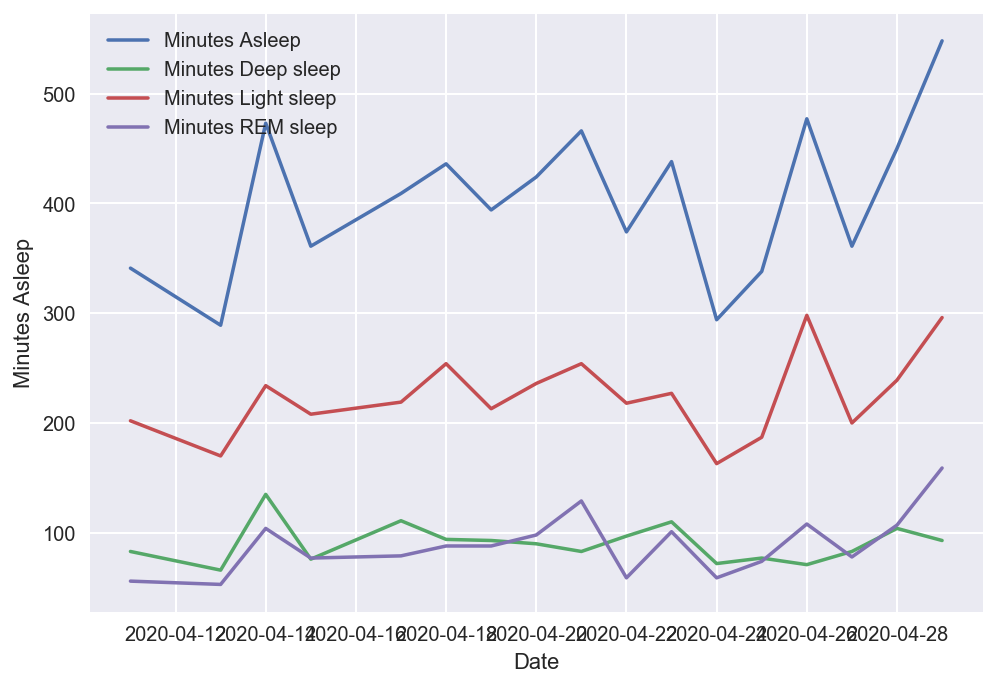

In [65]:
plt.plot(sleepData['Date'], sleepData['Minutes Asleep'])
plt.plot(sleepData['Date'], sleepData['Minutes Deep sleep'])
plt.plot(sleepData['Date'], sleepData['Minutes Light sleep'])
plt.plot(sleepData['Date'], sleepData['Minutes REM sleep'])
plt.xlabel('Date')
plt.ylabel('Minutes Asleep')
plt.legend()
plt.show()

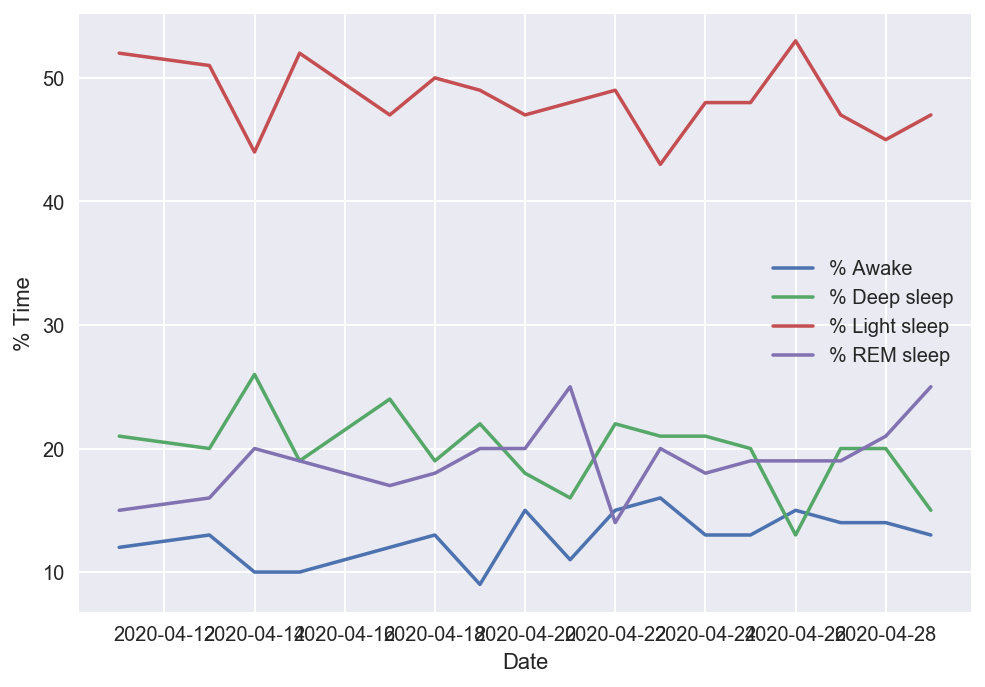

In [66]:
plt.plot(sleepData['Date'], sleepData['% Awake'])
plt.plot(sleepData['Date'], sleepData['% Deep sleep'])
plt.plot(sleepData['Date'], sleepData['% Light sleep'])
plt.plot(sleepData['Date'], sleepData['% REM sleep'])
plt.xlabel('Date')
plt.ylabel('% Time')
plt.legend()
plt.show()